In [1]:
import numpy as np
import pandas as pd
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import datetime as DT

In [2]:
#importing the dataset
data= pd.read_csv("Plum.csv", encoding='latin-1')

In [3]:
data.shape

(16476, 23)

In [4]:
data.head(5)

,Id,Requester id,Group,Status,Priority,Via,Created at,Updated at,Assigned at,Initially assigned at,...,Reopens,Replies,First reply time in minutes within business hours,First resolution time in minutes,First resolution time in minutes within business hours,Full resolution time in minutes,Full resolution time in minutes within business hours,Requester wait time in minutes,Requester wait time in minutes within business hours,Manual Tagging of Categories [list]
0,297732,10300555531549,Support,Solved,Low,Mail,08-04-2023 20:52,14-06-2023 16:30,09-04-2023 10:28,09-04-2023 10:28,...,11,11,173.0,12975.0,6488.0,96218.0,47978.0,17853.0,8516.0,Is my treatment covered (IMTC)
1,311457,10420228868125,Reimbursement Claims,Closed,Low,Mail,24-04-2023 19:32,15-06-2023 16:37,25-04-2023 10:18,25-04-2023 10:18,...,10,10,1527.0,2984.0,1527.0,45893.0,22853.0,30113.0,15139.0,-
2,329907,10991633548957,Support,Solved,Low,Mail,16-05-2023 17:43,30-05-2023 14:56,16-05-2023 18:18,16-05-2023 18:18,...,10,11,61.0,1563.0,843.0,19993.0,9913.0,7115.0,3335.0,Claims
3,301553,10376247288477,Support,Solved,Low,Mail,13-04-2023 11:03,15-06-2023 20:55,13-04-2023 13:04,13-04-2023 13:04,...,9,9,381.0,2888.0,1448.0,91313.0,45953.0,18221.0,9401.0,Claims
4,310966,7302858920989,Support,Closed,Low,Mail,24-04-2023 13:21,08-06-2023 18:37,27-04-2023 14:48,24-04-2023 13:48,...,9,9,37.0,37.0,37.0,36304.0,17739.0,7427.0,4008.0,Claims


In [5]:
#convert the object into datetime
data['Created at'] = pd.to_datetime(data['Created at'])
data['Updated at'] = pd.to_datetime(data['Updated at'])
data['Assigned at'] = pd.to_datetime(data['Assigned at'])
data['Initially assigned at'] = pd.to_datetime(data['Initially assigned at'])
data['Solved at'] = pd.to_datetime(data['Solved at'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16476 entries, 0 to 16475
Data columns (total 23 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   Id                                                      16476 non-null  int64         
 1   Requester id                                            16476 non-null  int64         
 2   Group                                                   16476 non-null  object        
 3   Status                                                  16476 non-null  object        
 4   Priority                                                16476 non-null  object        
 5   Via                                                     16476 non-null  object        
 6   Created at                                              16476 non-null  datetime64[ns]
 7   Updated at                                              16

# How are the efficiency numbers looking like? Can you share your views?

In [7]:
grouped_data6= data.groupby(['Group', 'Satisfaction Score'])['Resolution time'].mean()
print(grouped_data6)

Group    Satisfaction Score
Support  1                     429.800000
         2                     299.428571
         3                     199.093750
         4                     171.276527
         5                     109.513447
         Offered               107.314440
Name: Resolution time, dtype: float64


In [8]:
grouped_data5= data.groupby(['Group', 'Status'])['First resolution time in minutes within business hours'].mean()
print(grouped_data5)

Group                 Status 
Endorsements          Closed      5771.673967
                      Hold                NaN
                      New                 NaN
                      Open       14897.090909
                      Pending     7854.096774
                      Solved     15149.136970
Onboardings           Closed     11160.107981
                      New                 NaN
                      Open       13112.000000
                      Pending    10997.562500
                      Solved     24889.472603
Reimbursement Claims  Closed      3747.496538
                      Hold        5140.216867
                      Open        7364.400000
                      Pending             NaN
                      Solved     11286.588910
Support               Closed      1837.009775
                      Hold        5719.631579
                      Open        4546.960784
                      Pending     2857.500000
                      Solved      5073.139535
Name

In [28]:
grouped_data7= data.groupby(['Group'])['Requester wait time in minutes within business hours'].mean()
print("Group by it's Average Requester wait time in minutes within business hours:\n",grouped_data7)

Group by it's Average Requester wait time in minutes within business hours:
 Group
Endorsements            5236.520032
Onboardings             3942.043726
Reimbursement Claims    8882.695493
Support                 2969.893827
Name: Requester wait time in minutes within business hours, dtype: float64


In [24]:
grouped_data7= data.groupby(['Group'])['Replies'].mean()
print("Group by it's Average Replies ",grouped_data7)

Group by it's Average Replies  Group
Endorsements            1.104047
Onboardings             6.364151
Reimbursement Claims    2.753332
Support                 2.545855
Name: Replies, dtype: float64


Group by it's Average First reply time in minutes within business hours:
                   Group  First reply time in minutes within business hours
0          Endorsements                                        4207.170213
1  Reimbursement Claims                                        1511.346479
2           Onboardings                                        1363.774336
3               Support                                         316.797272


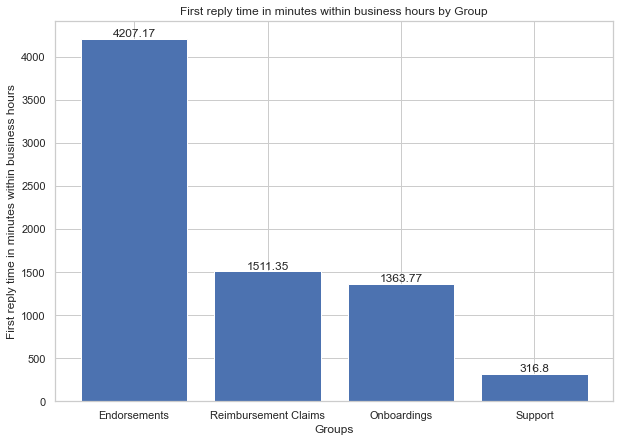

In [26]:
grouped_data2 = data.groupby('Group')['First reply time in minutes within business hours'].mean()
grouped_data2=grouped_data2.sort_values( ascending=False)
grouped_df2= pd.DataFrame(grouped_data2)
grouped_df2.reset_index(inplace=True)
print("Group by it's Average First reply time in minutes within business hours:\n",grouped_df2)
# Plotting the data
plt.figure(figsize=(10, 7))  # Set the figure size
plt.bar(grouped_df2['Group'],grouped_df2['First reply time in minutes within business hours'])
plt.xlabel('Groups')
plt.ylabel('First reply time in minutes within business hours')
plt.title('First reply time in minutes within business hours by Group')
# Add count labels to the bars
for p in plt.gca().patches:
    count = round(p.get_height(),2)
    plt.gca().annotate(count, (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
# Displaying the plot
plt.show()

# Which groups are quick, slow etc. Create a table + relevant charts.

In [11]:
grouped_data = data.groupby('Group')['Resolution time'].mean()
grouped_data=grouped_data.sort_values( ascending=False)

In [12]:
grouped_df= pd.DataFrame(grouped_data)
grouped_df.reset_index(inplace=True)
print(grouped_df.head())

                  Group  Resolution time
0           Onboardings       591.320334
1  Reimbursement Claims       249.072532
2          Endorsements       246.305926
3               Support       113.584816


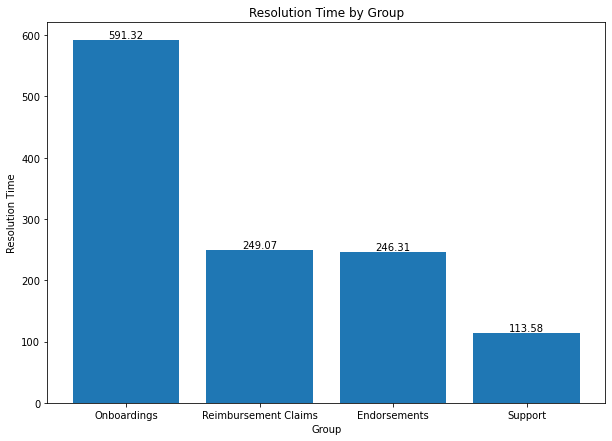

In [13]:
# Plotting the data
plt.figure(figsize=(10, 7))  # Set the figure size
plt.bar(grouped_df['Group'],grouped_df['Resolution time'])
plt.xlabel('Group')
plt.ylabel('Resolution Time')
plt.title('Resolution Time by Group')
# Add count labels to the bars
for p in plt.gca().patches:
    count = round(p.get_height(),2)
    plt.gca().annotate(count, (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
# Displaying the plot
plt.show()

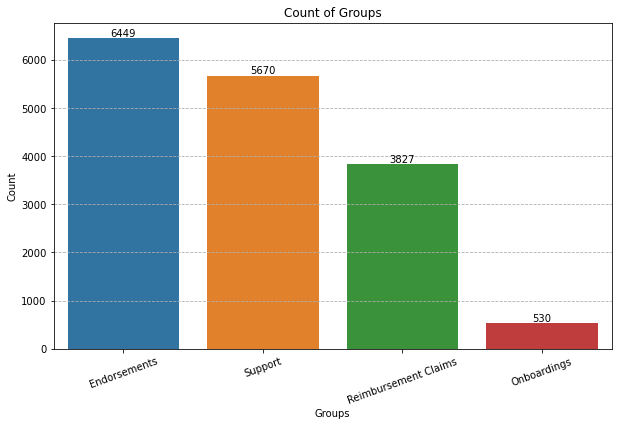

Endorsements            6449
Support                 5670
Reimbursement Claims    3827
Onboardings              530
Name: Group, dtype: int64


In [14]:
# Count the occurrences of each country
group_freq= data['Group'].value_counts()

# Plot the data using a bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
# Add grids to the plot
plt.grid(True, axis='y', linestyle='--')

sns.countplot(x='Group', data=data, order=group_freq.index)
plt.xlabel('Groups')
plt.ylabel('Count')
plt.title('Count of Groups')
# Add count labels to the bars
for p in plt.gca().patches:
     count = p.get_height()
     plt.gca().annotate(count, (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.xticks(rotation=20)  # Rotating the x-axis labels for better readability
plt.show()
print(group_freq)

Group                 Via                   
Endorsements          Closed Ticket             217.484375
                      Internal Communication    308.515152
                      Mail                      262.215312
                      OutBound                   62.532880
Onboardings           Closed Ticket             345.600000
                      Internal Communication    504.000000
                      Mail                      604.071006
                      OutBound                  479.000000
Reimbursement Claims  Closed Ticket             328.909091
                      Internal Communication      2.500000
                      Mail                      241.151364
                      OutBound                  302.565350
Support               Closed Ticket             161.349650
                      Internal Communication     56.677419
                      Mail                      145.457973
                      OutBound                  123.239669
Name: Resol

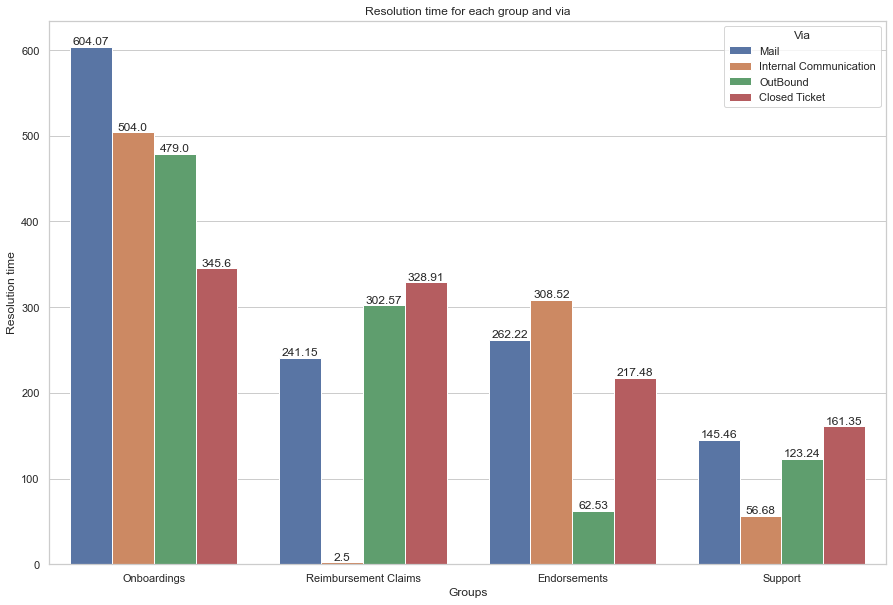

In [15]:
grouped_data4= data.groupby(['Group', 'Via'])['Resolution time'].mean()
print(grouped_data4)
grouped_data4=grouped_data4.sort_values( ascending=False)
grouped_df4= pd.DataFrame(grouped_data4)
grouped_df4.reset_index(inplace=True)
sns.set(style='whitegrid')
plt.figure(figsize=(15, 10))
sns.barplot(data=grouped_df4, x='Group',y='Resolution time', hue='Via')
plt.title('Resolution time for each group and via')
plt.xlabel('Groups')
plt.ylabel('Resolution time')
plt.legend(title='Via')
# Add count labels to the bars
for p in plt.gca().patches:
    count = round(p.get_height(),2)
    plt.gca().annotate(count, (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.show()

# What type of tickets are taking the most time to resolve? Create a table + relevant charts.

  Manual Tagging of Categories [list]  Resolution time
0                                   -       220.020403
1                           Health ID       204.153846
2                          HR Queries       199.606178
3                              Claims       133.807037
4      Is my treatment covered (IMTC)       123.898944


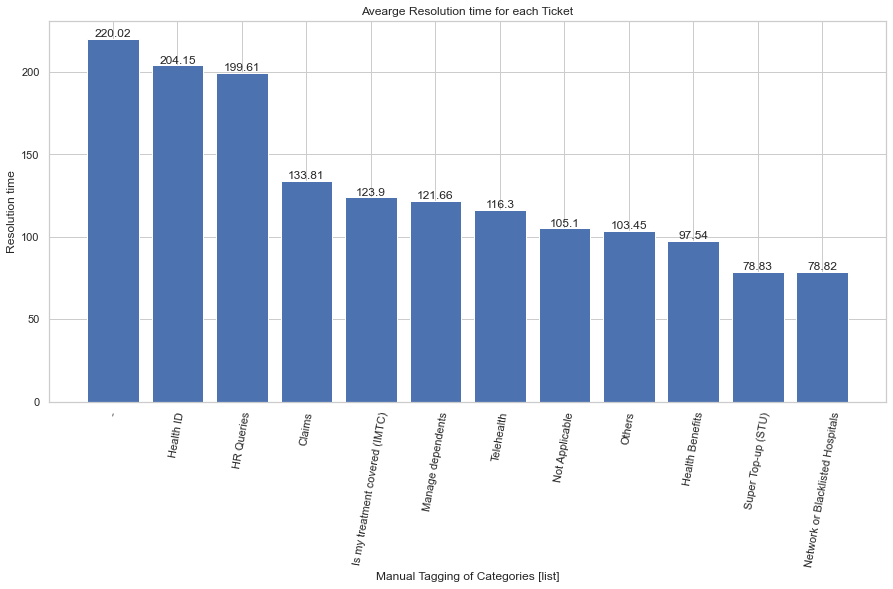

In [16]:
grouped_data3 = data.groupby('Manual Tagging of Categories [list]')['Resolution time'].mean()
grouped_data3=grouped_data3.sort_values( ascending=False)
grouped_df3= pd.DataFrame(grouped_data3)
grouped_df3.reset_index(inplace=True)
print(grouped_df3.head())
# Plotting the data
plt.figure(figsize=(15, 7))  # Set the figure size
plt.bar(grouped_df3['Manual Tagging of Categories [list]'],grouped_df3['Resolution time'])
plt.xlabel('Manual Tagging of Categories [list]')
plt.ylabel('Resolution time')
plt.title('Avearge Resolution time for each Ticket')
# Add count labels to the bars
for p in plt.gca().patches:
    count = round(p.get_height(),2)
    plt.gca().annotate(count, (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.xticks(rotation=80)  # Rotating the x-axis labels for better readability
# Displaying the plot
plt.show()

In [17]:
grouped_data6= data.groupby(['Group', 'Manual Tagging of Categories [list]','Satisfaction Score'])['Resolution time'].mean()
print(grouped_data6)

Group    Manual Tagging of Categories [list]  Satisfaction Score
Support  -                                    1                     281.666667
                                              2                     385.400000
                                              3                     141.037037
                                              4                     121.594340
                                              5                     104.281690
                                              Offered                92.905653
         Claims                               1                     604.250000
                                              2                     278.200000
                                              3                     169.222222
                                              4                     240.159420
                                              5                     100.065789
                                              Offered             

In [18]:
# Plotting the data
# plt.figure(figsize=(12, 8))  # Adjust the figure size if needed
# plt.bar(grouped_df4['Group'] + ' - ' + grouped_df4['Via'], grouped_df4['Resolution time'])
# plt.xlabel('Group - Via')
# plt.ylabel('Mean Resolution time Column')
# plt.title('Mean Resolution time Column by Group and Via')
# plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better visibility
# # Add count labels to the bars
# for p in plt.gca().patches:
#     count = round(p.get_height(),2)
#     plt.gca().annotate(count, (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
# # Displaying the plot
# plt.tight_layout()  # Adjust the layout if needed
# plt.show()

# Create the different type of data types we can infer from this data.

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16476 entries, 0 to 16475
Data columns (total 23 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   Id                                                      16476 non-null  int64         
 1   Requester id                                            16476 non-null  int64         
 2   Group                                                   16476 non-null  object        
 3   Status                                                  16476 non-null  object        
 4   Priority                                                16476 non-null  object        
 5   Via                                                     16476 non-null  object        
 6   Created at                                              16476 non-null  datetime64[ns]
 7   Updated at                                              16

In [20]:
data['Time to Solve'] = data['Solved at'] - data['Created at']

In [21]:
print(data['Time to Solve']," ",data['Solved at'])

0        -52 days +19:38:00
1          31 days 20:54:00
2          13 days 21:13:00
3          63 days 09:52:00
4          25 days 05:04:00
                ...        
16471   -146 days +11:32:00
16472    -26 days +11:02:00
16473                   NaT
16474      97 days 17:08:00
16475   -146 days +14:57:00
Name: Time to Solve, Length: 16476, dtype: timedelta64[ns]   0       2023-06-14 16:30:00
1       2023-05-26 16:26:00
2       2023-05-30 14:56:00
3       2023-06-15 20:55:00
4       2023-05-19 18:25:00
                ...        
16471   2023-01-06 10:09:00
16472   2023-05-06 09:49:00
16473                   NaT
16474   2023-09-06 16:43:00
16475   2023-01-06 14:40:00
Name: Solved at, Length: 16476, dtype: datetime64[ns]


In [22]:
print(data['Time to Solve'].dtype)

timedelta64[ns]
